# The Rise of Cryptocurrencies

<em> Ishaan Thakker </em>

### Introduction

If there is one thing that has increased dramatically during this pandemic, it is the increased exposure to the stock market for new investors. As these new investors slowly start to make their way over to other forms of investing, they are often led to a concept that is fairly new but familiar among most: cryptocurrencies (crypto for short). It is extremely important for people to learn the proper terminology and do proper research before risking hard earned money into this space.

### Background

A cryptocurrency (or “crypto”) is a digital currency that can be used to buy goods and services, but uses an online ledger with strong cryptography to secure online transactions. Much of the interest in these unregulated currencies is to trade for profit, with speculators at times driving prices skyward.<sup> 1 </sup>

The creation of the first decentralised peer-to-peer payment system, Bitcoin, has led to the creation of a novel and booming set of payment services- known collectively as ‘cryptocurrencies’. These digital currencies are not created or backed by any government, nor does any one user have complete control over. The price movement is one which is not normal when buying assests such as stocks, bonds, or even metals. And this movement can be daunting for new people trying to get into this space. Since the invention of Bitcoin in 2009, there are over 4000 different cryptocurrencies with the total market being valued at 2.23 trillion dollars. With so many options how can investors be sure that they are making the right decision when choosing to buy a specific currency? <sup>2</sup>

Like any currency, cryptocurrencies gain their value based on the scale of community involvement (like the user demand, scarcity or coin’s utility). In this digital age, it is important for people to have the right knowledge in this space to be able to make a smart investment and limit risk. The future is bright for blockchain and crypto and could soon enough be a centralized way of payment, but before that is reached, mainstream knowledge has to be spread.

### Research Questions

* **Question 1:** Which currencies have a leading position in the market?
* **Question 2:** How can moving averages and price fluctuations of cryptocurrencies be modeled with distributions?
* **Question 3:** Is Bitcoin related to other cryptocurrencies? How are the prices of those others affected?
* **Question 4:** Using machine learning, which currency or currencies are the best to buy?

### Project Setup and Methodology

With the first question I want to identify specifically how the cryptocurrency market is emerging, and how many currencies survive with time and how many die out. In exploring the second question, I want to explore the statistical characteristics of daily return and if there is a correlation between other currencies. With the third question, I want to use regression models to explain the dynamics of Crypto and compare between different choices. The last question I hope to use machine learning techniques such as K-means to find the optimal cryptocurrency. These questions are the general topics that I wish to explore but as I do more research they might subject to change.

### Important Terms

* Slug: name of crypto currency symbol
* Volume: amount of one currency traded over a period of time
* Market Cap: total market cap = units of currency in circulation * price of currency per unit

### Ethical Concerns

The ethical concerns relating to this problem are actually quite significant. First, people should never take anyones research and base it as their own when deciding to invest. It is important to learn key terms in the market before starting to invest. The research I will be doing only applies to my understand of crypto based on prior experience. That is not to say that people should not view my research it is simply to make sure each person does their own due diligence. Crytocurrency is by no means the safest investment and no one should allocate a large of there investment money into it. In terms of the bigger picture, this analysis could show people that the potential for these currencies is legit and that following large institutions and comapanies in buying these currencies might be a valuable investment. Banks, miners, creators of currencies and the common investor are all groups that could be affected by this analysis. When it comes to the blockchain development stack, there are three layers: the application layer, the networking layer, and the protocol layer. Each of these layers have different stakeholders and play a different role in this space of cryptocurrency. My analysis will affect all three layers which I will go into further detail with my analysis. <sup>3</sup>

### Importing Dataset and Tools

In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

crypto = pd.read_csv('data/crypto-markets.csv')

### Preparing Dataset

In [58]:
crypto['log_close'] = np.log(crypto.close)
crypto['log_volume'] = np.log(crypto.volume)
crypto['log_market'] = np.log(crypto.market)
crypto['spread'] = (crypto.high - crypto.low) / crypto.close
crypto['log_return'] = np.log(crypto.close / crypto.close.shift(1))
crypto['date'] = pd.to_datetime(crypto.date)

In [59]:
#crypto.close.shift(1).head()

In [60]:
crypto = crypto.replace([np.inf,-np.inf, np.nan], 0)
#crypto.head(10)

In [61]:
birth_time = pd.DataFrame(crypto.slug.value_counts())
birth_time['survival_time'] = birth_time.slug
birth_time['slug'] = birth_time.index
#birth_time.head()

crypto = pd.merge(crypto, birth_time, how='inner', left_on = 'slug', right_on = 'slug')
#crypto.describe()
crypto.close.head()

0    134.21
1    144.54
2    139.00
3    116.99
4    105.21
Name: close, dtype: float64

### Answering Research Question 1

In [62]:
crypto['date'] = pd.to_datetime(crypto['date'])
date_range = str(crypto['date'].dt.date.min()) + ' to ' + str(crypto['date'].dt.date.max())
print(date_range)

2013-04-28 to 2018-11-30


In [63]:
crypto_date = crypto[crypto.date == datetime(2018,11,29)]
crypto_date.sort_values('ranknow', ascending = True)
crypto_date['composition'] = np.where(crypto_date.ranknow <= 10, crypto_date.ranknow, 100)
crypto_mkt_comp = crypto_date.groupby(by = ['composition'])['market'].sum()

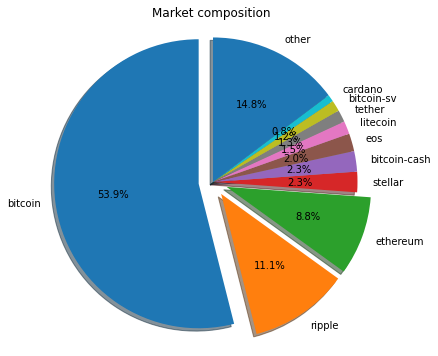

In [64]:
labels = crypto_date[crypto_date.ranknow <= 11].slug.replace('monero', 'other')
sizes = crypto_mkt_comp

make_larger = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Market composition')
ax1.pie(sizes, explode = make_larger, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

It can clearly be seen that more than half of the crypto space is occupied by Bitcoin. As the earliest virtual currency to meet widespread popularity and success, bitcoin has inspired a host of other cryptocurrencies in its wake. Since this data was last updated in 2018, there have been thousands of different cryptocurrencies in circulation. But understanding which ones have techinal use and which ones do not can be difficult.

### Answering Research Question 2

For this question I am selecting 6 cryptocurrencies and plotting price fluctuations and moving averages for each of them.

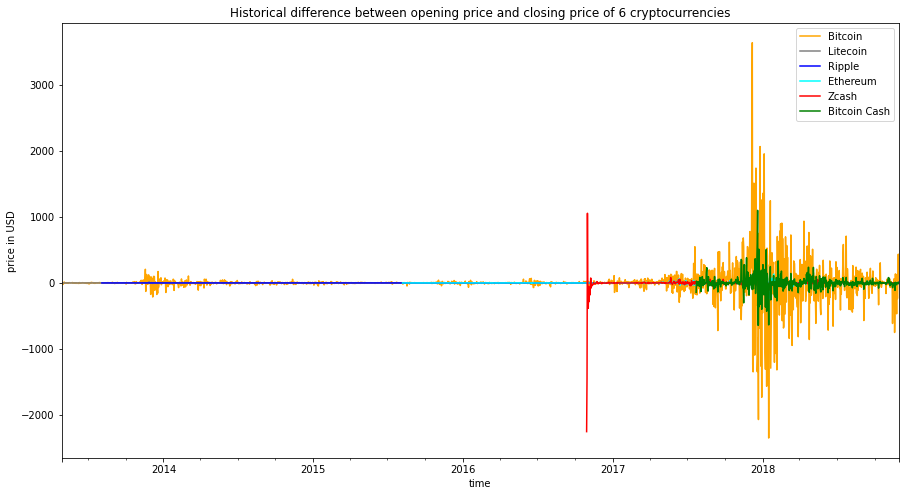

In [98]:
# Plotting Price Fluctuations
crypto2 = pd.read_csv('data/crypto-markets.csv', parse_dates=['date'],index_col='date')
crypto2['net']=crypto2['close']-crypto2['open']
bitcoin = crypto2[crypto2['symbol']=='BTC']
litecoin = crypto2[crypto2['symbol']=='LTC']
ripple = crypto2[crypto2['symbol']=='XRP']
ethereum = crypto2[crypto2['symbol']=='ETH']
zcash = crypto2[crypto2['symbol']=='ZEC']
bitcoin_cash = crypto2[crypto2['symbol']=='BCH']

plt.figure(figsize=(15,8))
(bitcoin['net']).plot(color='orange', label='Bitcoin')
(litecoin['net']).plot(color='grey', label='Litecoin')
(ripple['net']).plot(color='blue', label='Ripple')
(ethereum['net']).plot(color='cyan', label='Ethereum')
(zcash['net']).plot(color='red', label='Zcash')
(bitcoin_cash['net']).plot(color='green', label='Bitcoin Cash')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical difference between opening price and closing price of 6 cryptocurrencies')
plt.legend()
plt.show()

In [99]:
#Plotting Moving Averages
btc = bitcoin[['close']]
btc.columns = ['BTC']
btc_ma=btc.rolling(window=5).mean()

ltc = litecoin[['close']]
ltc.columns = ['LTC']
ltc_ma=ltc.rolling(window=5).mean()

xrp = ripple[['close']]
xrp.columns = ['XRP']
xrp_ma=xrp.rolling(window=5).mean()

eth = ethereum[['close']]
eth.columns = ['ETH']
eth_ma=eth.rolling(window=5).mean()

zec = zcash[['close']]
zec.columns = ['ZEC']
zec_ma=zec.rolling(window=5).mean()

bch = bitcoin_cash[['close']]
bch.columns = ['BCH']
bch_ma=bch.rolling(window=5).mean()

close = pd.concat([btc,ltc,xrp,eth,zec,bch], axis=1)
close_ma = pd.concat([btc_ma,ltc_ma,xrp_ma,eth_ma,zec_ma,bch_ma], axis=1)

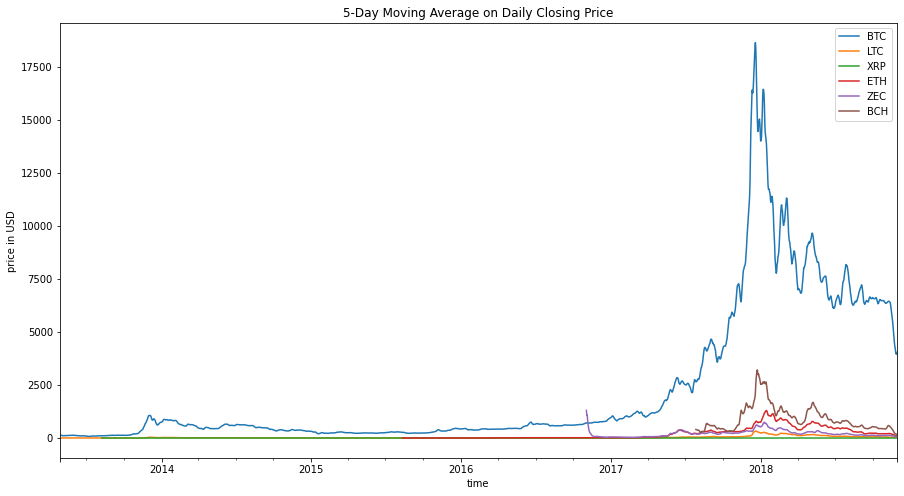

In [100]:
close_ma.plot(figsize=(15,8))
plt.title('5-Day Moving Average on Daily Closing Price')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.show()

By plotting price fluctuations and moving averages it can be seen that crypto is generally very volatile and that price fluctuations are relativly normal. Extreme volatility often has a negative connotation because many associate volatility with market chaos, uncertainty, and loss. When markets swing between extreme highs and lows, investors and traders may place more bets predicting continued swings, which in turn causes more price volatility. It is important to realize that volatility is normal and for cryptocurrencies this volaitility can be more than with general forms of investing such as stocks.

### Answering Research Question 3 

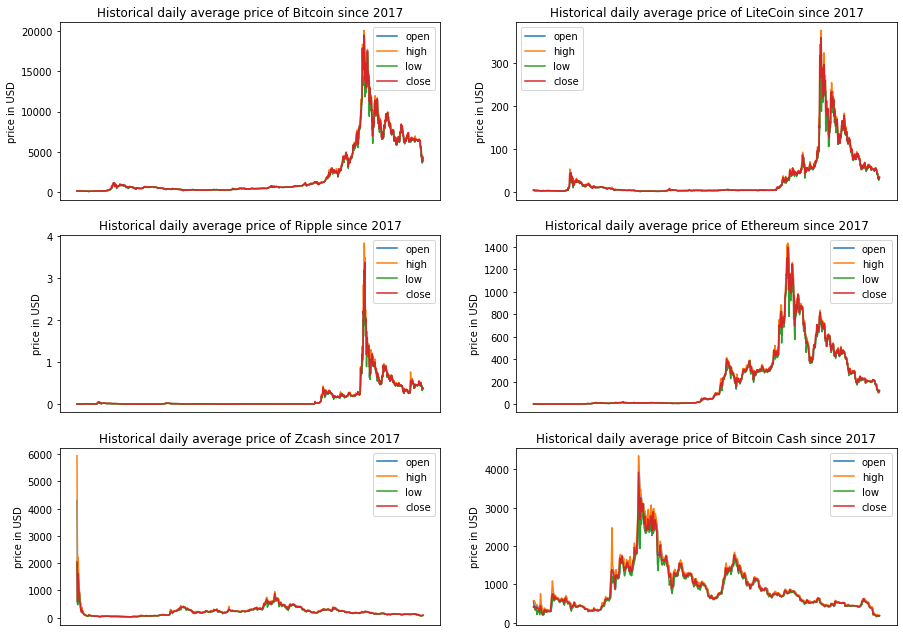

In [103]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
plt.plot(bitcoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.xticks([])
plt.title('Historical daily average price of Bitcoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,2)
plt.plot(litecoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.xticks([])
plt.title('Historical daily average price of LiteCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,3)
plt.plot(ripple[['open','high','low','close']])
plt.ylabel('price in USD')
plt.xticks([])
plt.title('Historical daily average price of Ripple since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,4)
plt.plot(ethereum[['open','high','low','close']])
plt.ylabel('price in USD')
plt.xticks([])
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,5)
plt.plot(zcash[['open','high','low','close']])
plt.ylabel('price in USD')
plt.xticks([])
plt.title('Historical daily average price of Zcash since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,6)
plt.plot(bitcoin_cash[['open','high','low','close']])
plt.ylabel('price in USD')
plt.xticks([])
plt.title('Historical daily average price of Bitcoin Cash since 2017')
plt.legend(['open','high','low','close'])

plt.show()

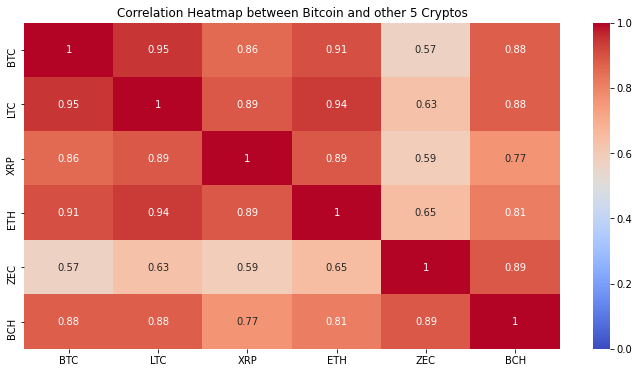

In [104]:
plt.figure(figsize=(12,6))
sns.heatmap(close.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other 5 Cryptos')
plt.show()

As it can be seen with the first set of graphs, this space of cryptocurrencies has developed recently and 2017 was fundamentally a big year with most coins including Bitcoin exploding onto the scene. As the market cooled off until the later part of 2020 we have seen an exponential jump since then. The heatmap shows that Bitcoins price does have a impact on other cryptocurrencies. There is a strong positive correlation between Bitcoins price when compared to other leaders in this space. Fast foward to today and this is still true as the crypto market is widely influenced by a few big names along with Bitcoin including Ethereum and Cardano.

### Answering Research Question 4: